<a href="https://colab.research.google.com/github/Vikim1000/Machine-learning--Business-Case/blob/main/Zee5_Recommendation_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ZEE5- Recommendation System

Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.

## Data fields

Data Dictionary:

RATINGS FILE DESCRIPTION

=========================================================================

All ratings are contained in the file "ratings.dat" and are in the following format:

UserID::MovieID::Rating::Timestamp

    UserIDs range between 1 and 6040

    MovieIDs range between 1 and 3952

    Ratings are made on a 5-star scale (whole-star ratings only)

    Timestamp is represented in seconds

    Each user has at least 20 ratings

USERS FILE DESCRIPTION

=========================================================================

User information is in the file "users.dat" and is in the following format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is not checked for accuracy.
Only users who have provided some demographic information are included in this data set.

    Gender is denoted by a "M" for male and "F" for female

    Age is chosen from the following ranges:

        1: "Under 18"

        18: "18-24"

        25: "25-34"

        35: "35-44"

        45: "45-49"

        50: "50-55"

        56: "56+"

    Occupation is chosen from the following choices:

        0: "other" or not specified

        1: "academic/educator"

        2: "artist"

        3: "clerical/admin"

        4: "college/grad student"

        5: "customer service"

        6: "doctor/health care"

        7: "executive/managerial"

        8: "farmer"

        9: "homemaker"

        10: "K-12 student"

        11: "lawyer"

        12: "programmer"

        13: "retired"

        14: "sales/marketing"

        15: "scientist"

        16: "self-employed"

        17: "technician/engineer"

        18: "tradesman/craftsman"

        19: "unemployed"

        20: "writer"

MOVIES FILE DESCRIPTION

=========================================================================

Movie information is in the file "movies.dat" and is in the following format:

MovieID::Title::Genres

    Titles are identical to titles provided by the IMDB (including year of release)

    Genres are pipe-separated and are selected from the following genres:

        Action

        Adventure

        Animation

        Children's

        Comedy

        Crime

        Documentary

        Drama

        Fantasy

        Film-Noir

        Horror

        Musical

        Mystery

        Romance

        Sci-Fi

        Thriller

        War

        Western


## Problem Statement

Building a recommendation system for the Zee5, so that we can able to recommend users , what movies to watch next based on user based , movie based

In [ ]:
#impoorting Libraties

import numpy as np
import numpy.random as rd
import pandas as pd
import matplotlib.pyplot as plt
import plotly as pt
import plotly.express as px
import seaborn as sbn
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%config InlineBackend.figure_format ='retina'

#statastics 

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot
from sklearn.metrics import roc_auc_score

import re 
from sklearn import preprocessing

from sklearn.model_selection import train_test_split


from sklearn.ensemble import GradientBoostingClassifier

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import GridSearchCV

In [ ]:
## Connecting to drive
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
#Import dataset

df_movies= pd.read_fwf('/content/gdrive/MyDrive/Scaler Assignment/Zee5-Recommendation_System/zee-movies.dat', encoding='ISO-8859-1')
df_users= pd.read_fwf('/content/gdrive/MyDrive/Scaler Assignment/Zee5-Recommendation_System/zee-users.dat', encoding='ISO-8859-1')
df_ratings= pd.read_fwf('/content/gdrive/MyDrive/Scaler Assignment/Zee5-Recommendation_System/zee-ratings.dat', encoding='ISO-8859-1')

In [ ]:
df_movies.head()

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN


In [ ]:
df_ratings.head()

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [ ]:
df_users.head()

,UserID::Gender::Age::Occupation::Zip-code
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
3,4::M::45::7::02460
4,5::M::25::20::55455


In [ ]:
## Adding and removing columns- df_movies
df_movies['Movie_ID']=df_movies['Movie ID::Title::Genres'].str.split('::').str[0]
df_movies['Title']=df_movies['Movie ID::Title::Genres'].str.split('::').str[1]
df_movies['Genres']=df_movies['Movie ID::Title::Genres'].str.split('::').str[2]

## Removing columns
df_movies=df_movies.drop(['Unnamed: 1', 'Unnamed: 2','Movie ID::Title::Genres'], axis=1)

#---------------------------------------------------------------------------------------------------

## Adding and removing columns- df_users
df_users['User_ID']=df_users['UserID::Gender::Age::Occupation::Zip-code'].str.split('::').str[0]
df_users['Gender']=df_users['UserID::Gender::Age::Occupation::Zip-code'].str.split('::').str[1]
df_users['Age']=df_users['UserID::Gender::Age::Occupation::Zip-code'].str.split('::').str[2]
df_users['Occupation']=df_users['UserID::Gender::Age::Occupation::Zip-code'].str.split('::').str[3]
df_users['Zip_Code']=df_users['UserID::Gender::Age::Occupation::Zip-code'].str.split('::').str[4]

## Removing columns
df_users=df_users.drop(['UserID::Gender::Age::Occupation::Zip-code'], axis=1)

#---------------------------------------------------------------------------------------------------

## Adding and removing columns- df_ratings
df_ratings['User_ID']=df_ratings['UserID::MovieID::Rating::Timestamp'].str.split('::').str[0]
df_ratings['Movie_ID']=df_ratings['UserID::MovieID::Rating::Timestamp'].str.split('::').str[1]
df_ratings['Rating']=df_ratings['UserID::MovieID::Rating::Timestamp'].str.split('::').str[2]
df_ratings['Timestamp']=df_ratings['UserID::MovieID::Rating::Timestamp'].str.split('::').str[3]

## Removing columns
df_ratings=df_ratings.drop(['UserID::MovieID::Rating::Timestamp'], axis=1)

## Feature Engineering 

In [ ]:
df_movies['Genres'] = df_movies['Genres'].fillna(df_movies['Genres'].mode()[0])

# Extecting year released
df_movies['Year_Released']=df_movies['Title'].str.split('(').str[1].str.split(')').str[0]

In [ ]:
## We add the missing Genres 

# Later needs to add via knn imputer or any algo
m = df_movies.copy()
# pivot
m['Genres'] = m['Genres'].str.split('|')
m = m.explode('Genres')
m = m.pivot(index='Movie_ID', columns='Genres',values='Title')
m = ~m.isna()
m = m.astype(int)
m.head(5)

Genres,,A,Acti,Action,Adv,Advent,Adventu,Adventur,Adventure,Animati,...,Sci-Fi,Th,Thri,Thrille,Thriller,Wa,War,We,Wester,Western
Movie_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   User_ID    1000209 non-null  object
 1   Movie_ID   1000209 non-null  object
 2   Rating     1000209 non-null  object
 3   Timestamp  1000209 non-null  object
dtypes: object(4)
memory usage: 30.5+ MB


In [ ]:
df_ratings.isna().sum()

User_ID      0
Movie_ID     0
Rating       0
Timestamp    0
dtype: int64

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Movie_ID       3883 non-null   object
 1   Title          3883 non-null   object
 2   Genres         3883 non-null   object
 3   Year_Released  3881 non-null   object
dtypes: object(4)
memory usage: 121.5+ KB


In [ ]:
df_movies.isna().sum()

Movie_ID         0
Title            0
Genres           0
Year_Released    2
dtype: int64

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User_ID     6040 non-null   object
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   object
 3   Occupation  6040 non-null   object
 4   Zip_Code    6040 non-null   object
dtypes: object(5)
memory usage: 236.1+ KB


In [ ]:
df_users.isna().sum()

User_ID       0
Gender        0
Age           0
Occupation    0
Zip_Code      0
dtype: int64

### Merging Columns to single Dataframe

In [ ]:
#Merging multiple dataframes to single 
x= df_ratings.merge(df_users,left_on="User_ID",right_on="User_ID",how="left")

y= x.merge(df_movies,left_on="Movie_ID",right_on="Movie_ID",how="left")
y["Genres"]=y["Genres"].str.split("|")
y['Year_Released']=y['Title'].str.split('(').str[1].str.split(')').str[0]
y['Title']=y['Title'].str.split('(').str[0]
df=y

In [ ]:
m.head()

Genres,,A,Acti,Action,Adv,Advent,Adventu,Adventur,Adventure,Animati,...,Sci-Fi,Th,Thri,Thrille,Thriller,Wa,War,We,Wester,Western
Movie_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,User_ID,Movie_ID,Rating,Timestamp,Gender,Age,Occupation,Zip_Code,Title,Genres,Year_Released
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest,[Drama],1975
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach,"[Animation, Children's, Musical]",1996
2,1,914,3,978301968,F,1,10,48067,My Fair Lady,"[Musical, Romance]",1964
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich,[Drama],2000
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A","[Animation, Children's, Comedy]",1998


In [ ]:
df.head()

,User_ID,Movie_ID,Rating,Timestamp,Gender,Age,Occupation,Zip_Code,Title,Genres,Year_Released
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest,[Drama],1975
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach,"[Animation, Children's, Musical]",1996
2,1,914,3,978301968,F,1,10,48067,My Fair Lady,"[Musical, Romance]",1964
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich,[Drama],2000
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A","[Animation, Children's, Comedy]",1998


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   User_ID        1000209 non-null  object
 1   Movie_ID       1000209 non-null  object
 2   Rating         1000209 non-null  object
 3   Timestamp      1000209 non-null  object
 4   Gender         1000209 non-null  object
 5   Age            1000209 non-null  object
 6   Occupation     1000209 non-null  object
 7   Zip_Code       1000209 non-null  object
 8   Title          1000209 non-null  object
 9   Genres         1000209 non-null  object
 10  Year_Released  998731 non-null   object
dtypes: object(11)
memory usage: 91.6+ MB


In [ ]:
df.head()

,User_ID,Movie_ID,Rating,Timestamp,Gender,Age,Occupation,Zip_Code,Title,Genres,Year_Released
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest,[Drama],1975
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach,"[Animation, Children's, Musical]",1996
2,1,914,3,978301968,F,1,10,48067,My Fair Lady,"[Musical, Romance]",1964
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich,[Drama],2000
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A","[Animation, Children's, Comedy]",1998


In [ ]:
df.isna().sum()

User_ID             0
Movie_ID            0
Rating              0
Timestamp           0
Gender              0
Age                 0
Occupation          0
Zip_Code            0
Title               0
Genres              0
Year_Released    1478
dtype: int64

In [ ]:
df.shape

(1000209, 12)

In [ ]:
#changing non numeric values to numeric

df['Year_Released'] = pd.to_numeric(df['Year_Released'], errors='coerce')
df['Year_Released'] = df['Year_Released'].fillna(df['Year_Released'].mode()[0])

df['Zip_Code'] = pd.to_numeric(df['Zip_Code'], errors='coerce')
df['Zip_Code'] = df['Zip_Code'].fillna(df['Zip_Code'].mode()[0])

In [ ]:
## Datatype of columns needs to be changed
cols_change= ['Movie_ID', 'Rating', 'Age', 'Occupation','Year_Released','Zip_Code','Timestamp']
for column in cols_change:
  df[column] = df[column].astype(int)

In [ ]:
# Removing timestamp
df['hour'] = df['Timestamp'].apply(lambda x: datetime.fromtimestamp(x).hour)
df=df.drop(['Timestamp'], axis=1)

In [ ]:
#Category columns
category_columns=df.dtypes=="O"
cat_cols= category_columns[category_columns].index
cat_cols

Index(['User_ID', 'Gender', 'Title', 'Genres'], dtype='object')

In [ ]:
#Numerical columns
numerical_columns=df.dtypes!="O"
num_cols= numerical_columns[numerical_columns].index
num_cols

Index(['Movie_ID', 'Rating', 'Age', 'Occupation', 'Zip_Code', 'Year_Released',
       'hour'],
      dtype='object')

In [ ]:
columns = ['User_ID', 'hour', 'Gender', 'Zip_Code', 'Title', 'Genres',
       'Year_Released']
for col in columns:
  print("Value Counts in", col)
  print("")
  print(df[col].value_counts())
  print("")

Value Counts in User_ID

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
5725      20
3407      20
1664      20
4419      20
3021      20
Name: User_ID, Length: 6040, dtype: int64

Value Counts in hour

21    65491
3     62396
20    59709
19    59201
18    59138
2     59068
1     58223
4     55443
0     55397
22    55098
17    53565
23    50075
16    48954
5     42064
15    40385
6     33987
14    28865
7     27519
13    20917
8     20547
12    13221
9     12959
10     9370
11     8617
Name: hour, dtype: int64

Value Counts in Gender

M    753769
F    246440
Name: Gender, dtype: int64

Value Counts in Zip_Code

94110    17028
60640     3430
98103     3204
95616     3079
2138      3019
         ...  
99508       20
89185       20
76707       20
90732       20
14706       20
Name: Zip_Code, Length: 3374, dtype: int64

Value Counts in Title

American Beauty                                    3428
Star Wars: Episode IV - A New Hope                 2991
Star Wa

## Correleation -Heatmap

In [ ]:
df_copy = df.copy().corr(method='pearson')
fig = px.imshow(df_copy, text_auto=True, width=1000, height=600)
fig.show()

We can see that . the Age has high correlation , and the occupation also has high correlation with Rating

##Univariate Analysis

In [ ]:
num_cols

Index(['Movie_ID', 'Rating', 'Age', 'Occupation', 'Zip_Code', 'Year_Released',
       'hour'],
      dtype='object')

<Axes: xlabel='Movie_ID', ylabel='Density'>

<Axes: xlabel='Rating', ylabel='Density'>

<Axes: xlabel='Age', ylabel='Density'>

<Axes: xlabel='Occupation', ylabel='Density'>

<Axes: xlabel='Zip_Code', ylabel='Density'>

<Axes: xlabel='Year_Released', ylabel='Density'>

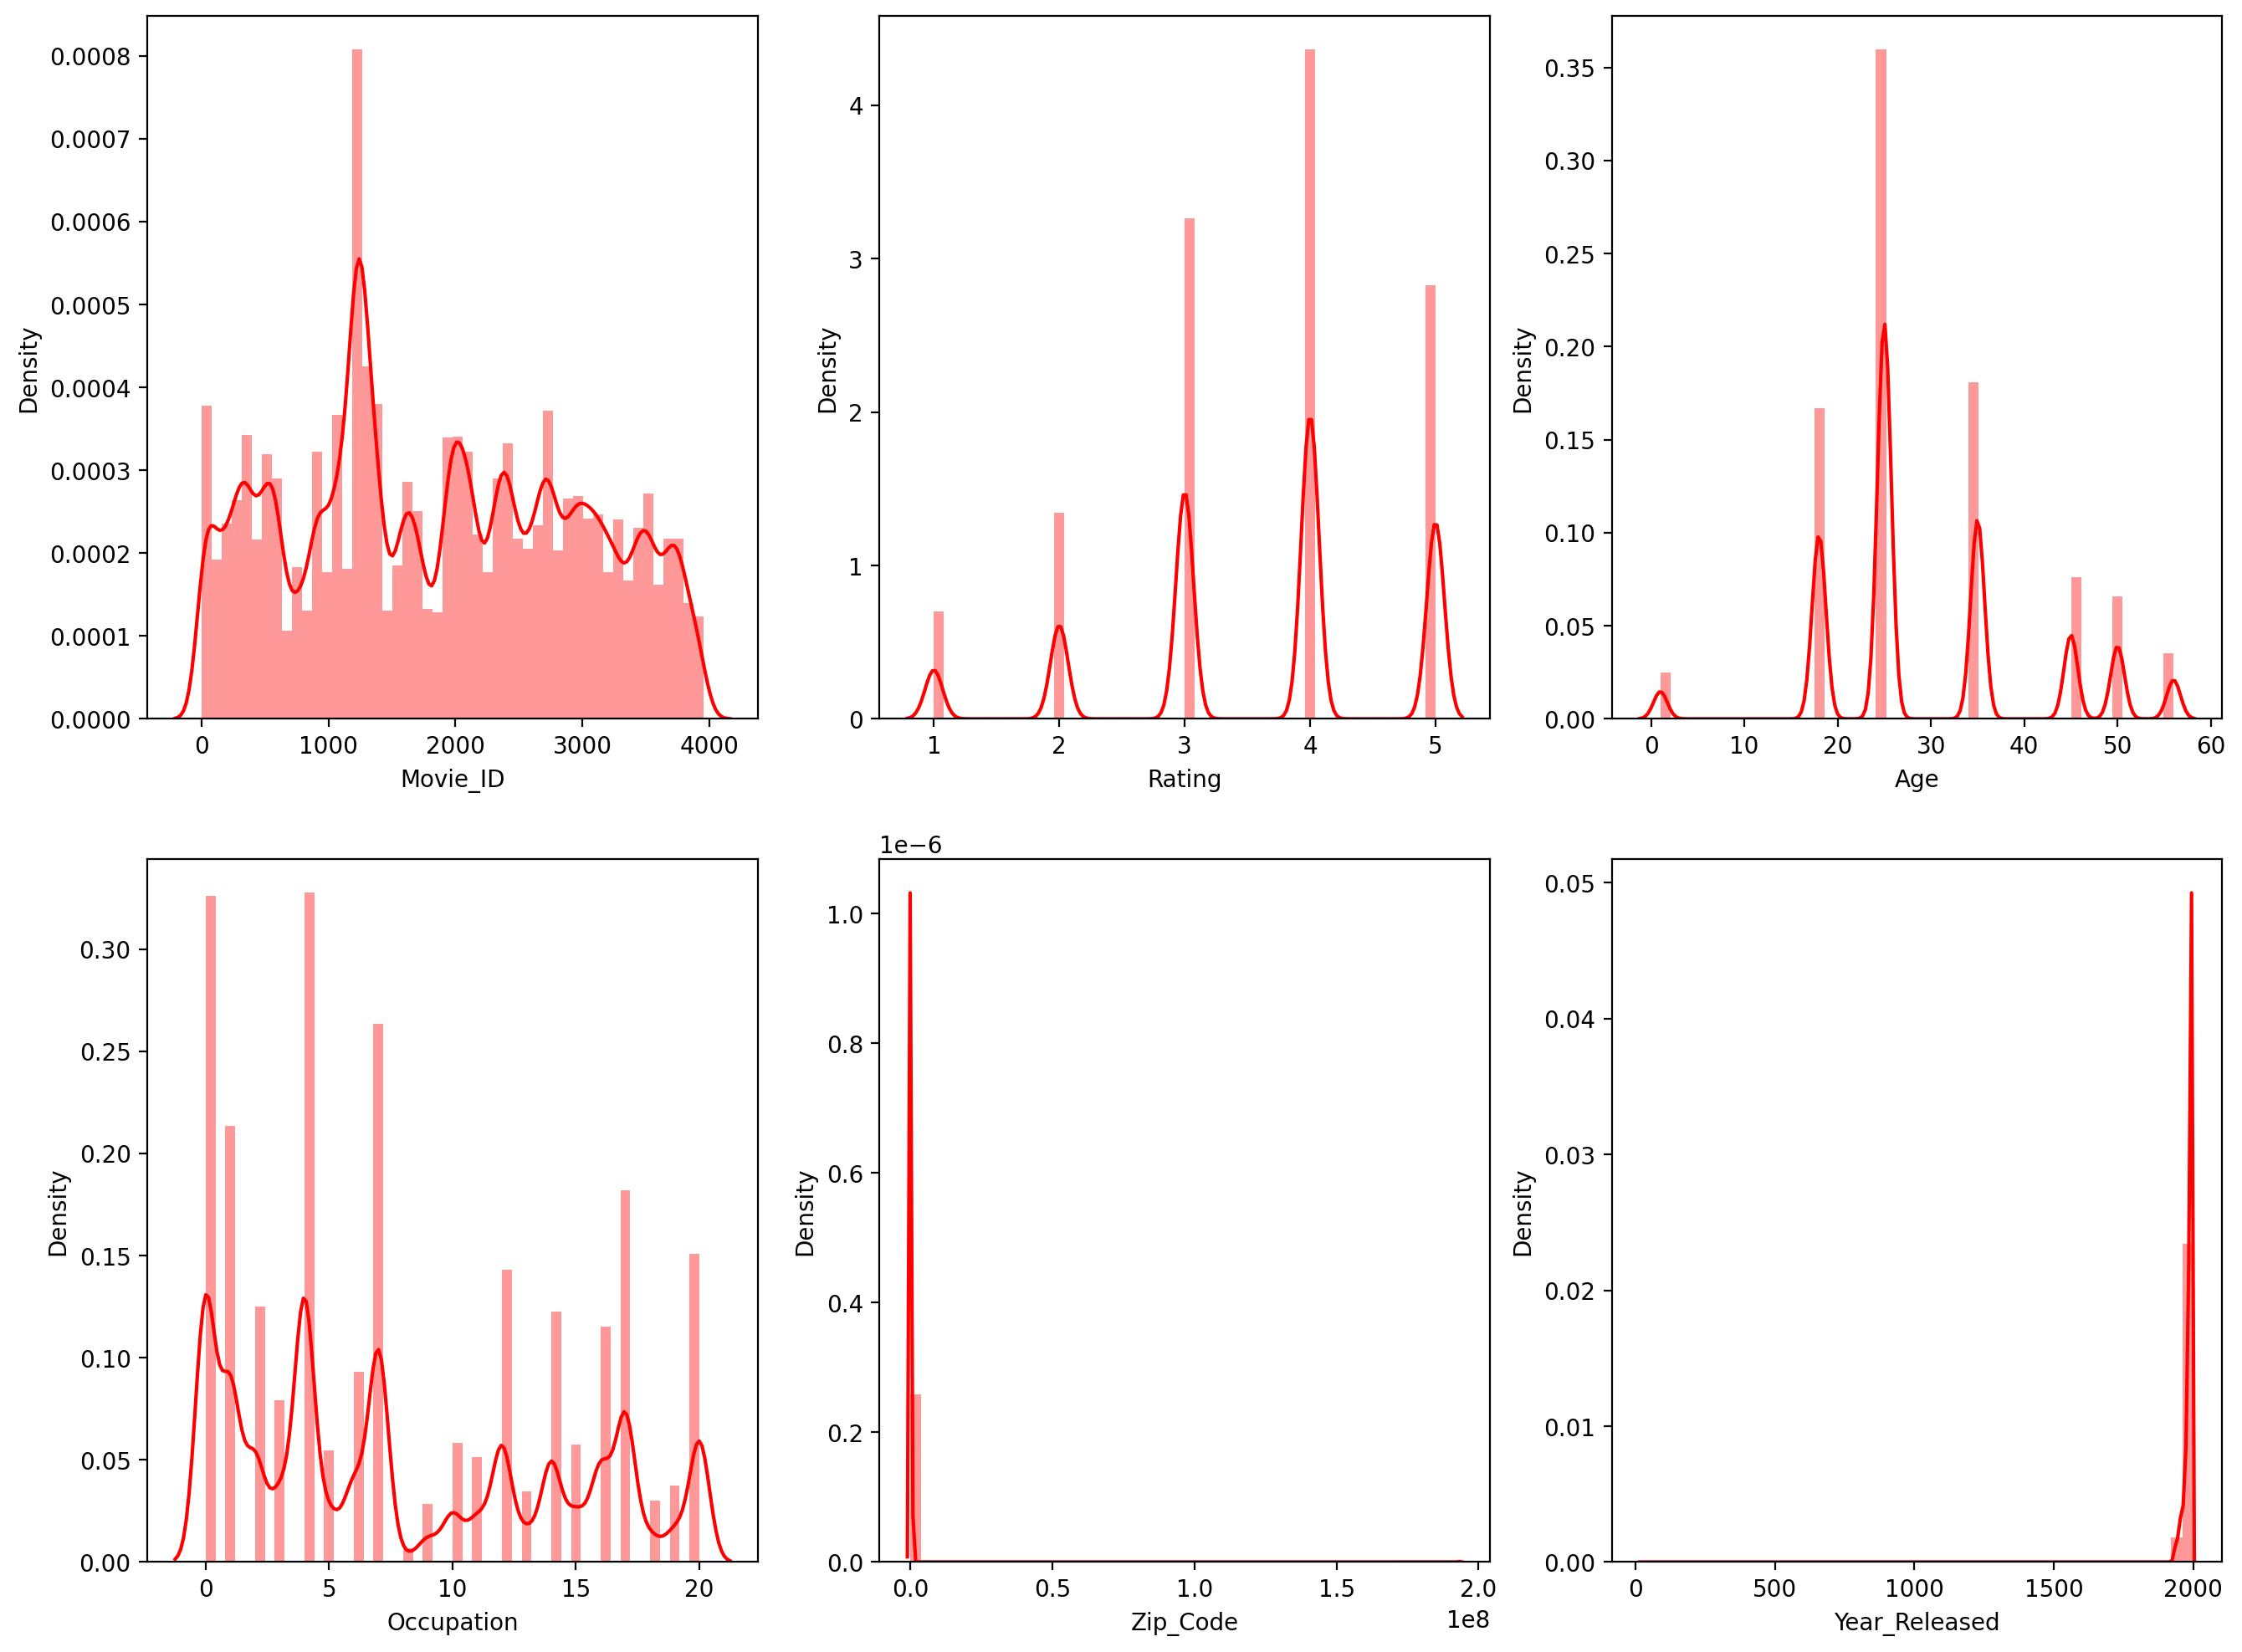

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.distplot(df[num_cols[index]], ax=axis[row, col], color ='red' ,kde=True)
        index += 1      
plt.show()


We can see that the movies are releaed more in the mid , abd the age category of 25 are more in date, and more movies are released between 1950-2000.
The occupation of 5 is higher in dataset

In [ ]:
df['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

In [ ]:
df[df['Age']==1]['Rating'].value_counts().sum()

27211

### Movie with maximum number of Rating

In [ ]:
average_rating = pd.DataFrame(df.groupby('Title')['Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(df.groupby('Title')['Rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,Rating,ratingCount
Title,,
American Beauty,4.317386,3428
Star Wars: Episode IV - A New Hope,4.453694,2991
Star Wars: Episode V - The Empire Strikes Back,4.292977,2990
Star Wars: Episode VI - Return of the Jedi,4.022893,2883
Jurassic Park,3.763847,2672


In [ ]:
average_rating = pd.DataFrame(df.groupby('Title')['Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(df.groupby('Title')['Rating'].count())
average_rating.sort_values('ratingCount', ascending=True).head()

,Rating,ratingCount
Title,,
White Boys,1.0,1
For Ever Mozart,3.0,1
Even Dwarfs Started Small,1.0,1
Foolish,3.0,1
Ménage,2.0,1


The lowest rated movie is White boys which has 1 rating

The movie with maximum ratingcount is **American Beauty**

<Figure size 1400x2000 with 0 Axes>

j=elks:: 0


<Axes: >

<Axes: xlabel='Occupation', ylabel='Density'>

Text(0.5, 1.0, 'Occupation')

<Axes: >

Text(0.5, 1.0, 'Occupation Spread')

<Axes: title={'center': 'Occupation Spread'}, ylabel='Occupation'>

j=elks:: 1


<Axes: >

<Axes: xlabel='Year_Released', ylabel='Density'>

Text(0.5, 1.0, 'Year_Released')

<Axes: >

Text(0.5, 1.0, 'Year_Released Spread')

<Axes: title={'center': 'Year_Released Spread'}, ylabel='Year_Released'>

j=elks:: 2


<Axes: >

<Axes: xlabel='Rating', ylabel='Density'>

Text(0.5, 1.0, 'Rating')

<Axes: >

Text(0.5, 1.0, 'Rating Spread')

<Axes: title={'center': 'Rating Spread'}, ylabel='Rating'>

j=elks:: 3


<Axes: >

<Axes: xlabel='Age', ylabel='Density'>

Text(0.5, 1.0, 'Age')

<Axes: >

Text(0.5, 1.0, 'Age Spread')

<Axes: title={'center': 'Age Spread'}, ylabel='Age'>

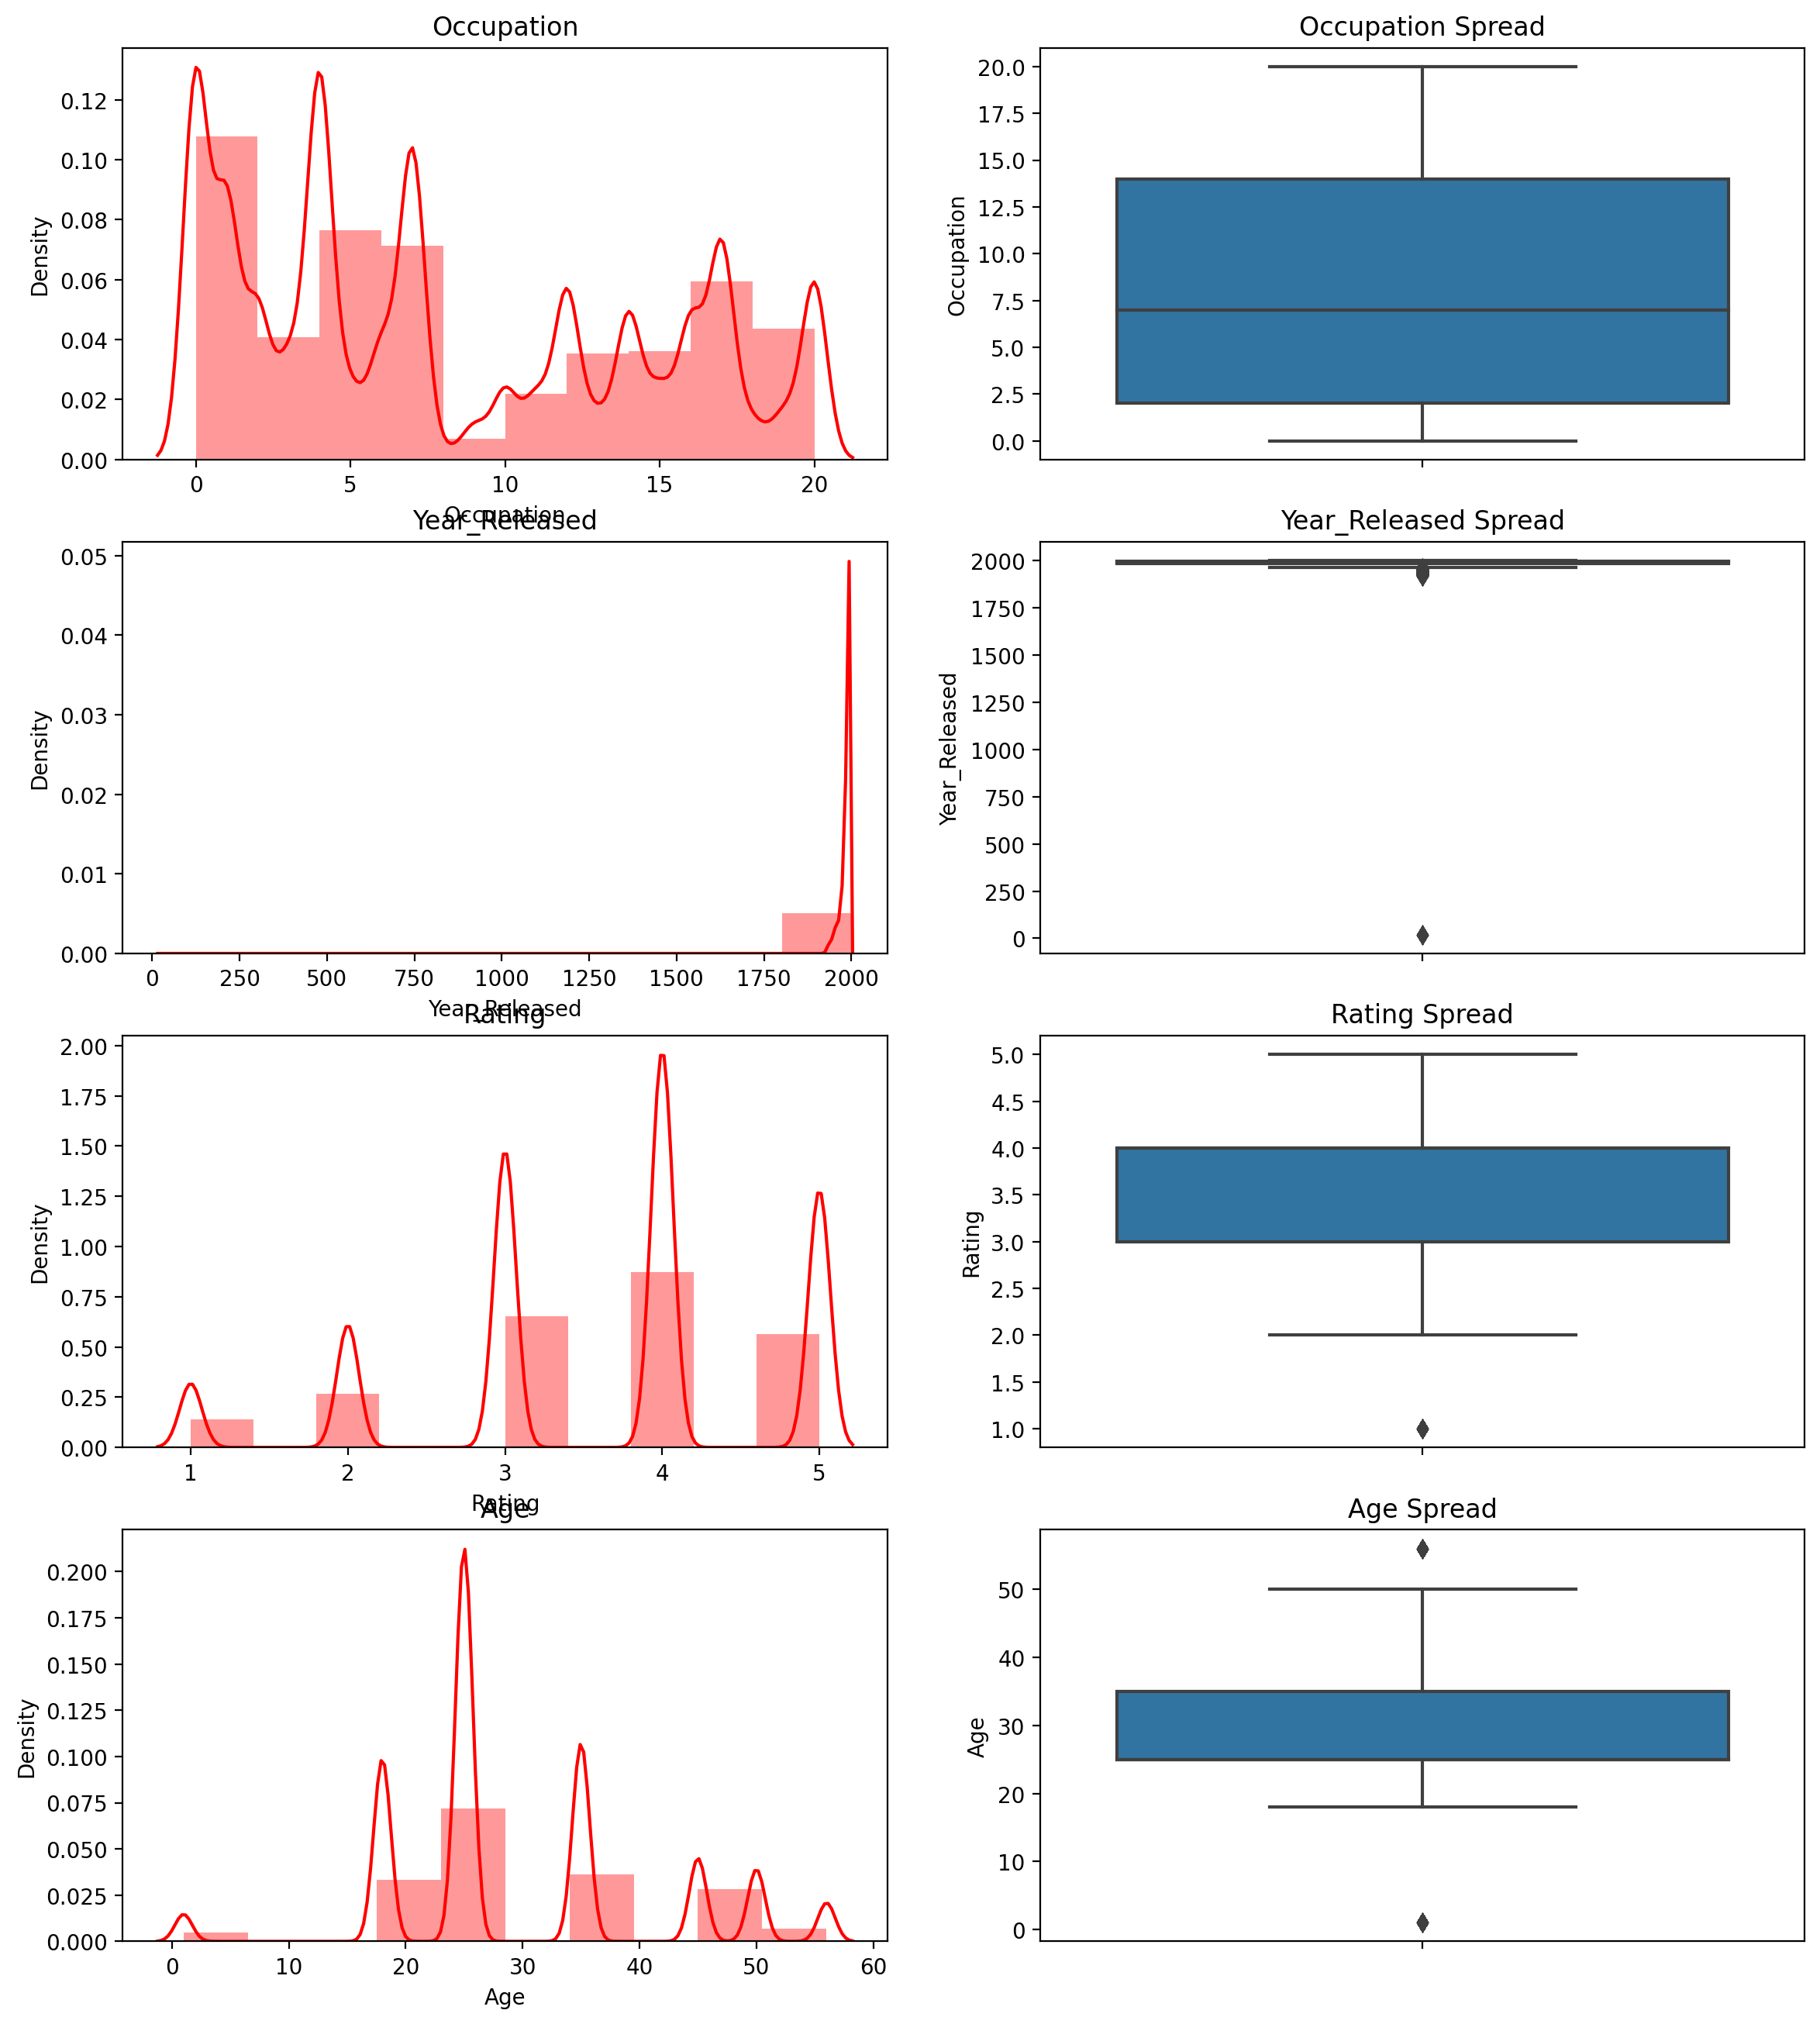

In [ ]:
## Boxplot

plt.figure(figsize=(14, 20))

cols=['Occupation', 'Year_Released', 'Rating','Age']
i=0
for j in range(len(cols)):
  for f in range(2):
    i=i+1
    if i==15:
      break
    elif i %2 !=0:
      print("j=elks::",j)
      plt.subplot(5, 2, i)
      sns.distplot(df[cols[j]],bins=10, color ='red' ,kde=True)
      plt.title(cols[j])
    else:
      plt.subplot(5, 2, i)
      plt.title(cols[j] + ' Spread')
      sns.boxplot(y=df[cols[j]])



From the above graphs , we can see there are no outliers present

In [ ]:
# users of which group watches and rated most movies
#rating age wise

## Age wise hospitalization charges

md=df[df['Age']==1]['Rating'].value_counts().sum()
td=df[df['Age']==18]['Rating'].value_counts().sum()
sd=df[df['Age']==25]['Rating'].value_counts().sum()
fd=df[df['Age']==35]['Rating'].value_counts().sum()
kd=df[df['Age']==45]['Rating'].value_counts().sum()
xd=df[df['Age']==50]['Rating'].value_counts().sum()
cd=df[df['Age']==56]['Rating'].value_counts().sum()

data_dict1 = {'Count':[md,td,sd,fd,kd,xd,cd], 'agegrp': ["1","18","25","35","45", "50","56"]}
df_b = pd.DataFrame(data=data_dict1, columns=['Count','agegrp'])
px.bar(data_frame=df_b, x="agegrp", y="Count", color="agegrp", barmode="group",title="Ratings given Agewise")

From the abpove , we can tell the age group of 25 has given more number of ratings

## Multivariate Analysis

Rating,1,2,3,4,5,All
Age,,,,,,
1,2238,2983,6380,8808,6802,27211
18,13063,22073,47601,60241,40558,183536
25,23898,44817,104287,136824,85730,395556
35,9067,20253,52990,71983,44710,199003
45,3409,8437,22311,30334,19142,83633
50,2948,5993,18465,26484,18600,72490
56,1551,3001,9163,14297,10768,38780
All,56174,107557,261197,348971,226310,1000209


<Axes: xlabel='Age'>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Rating')

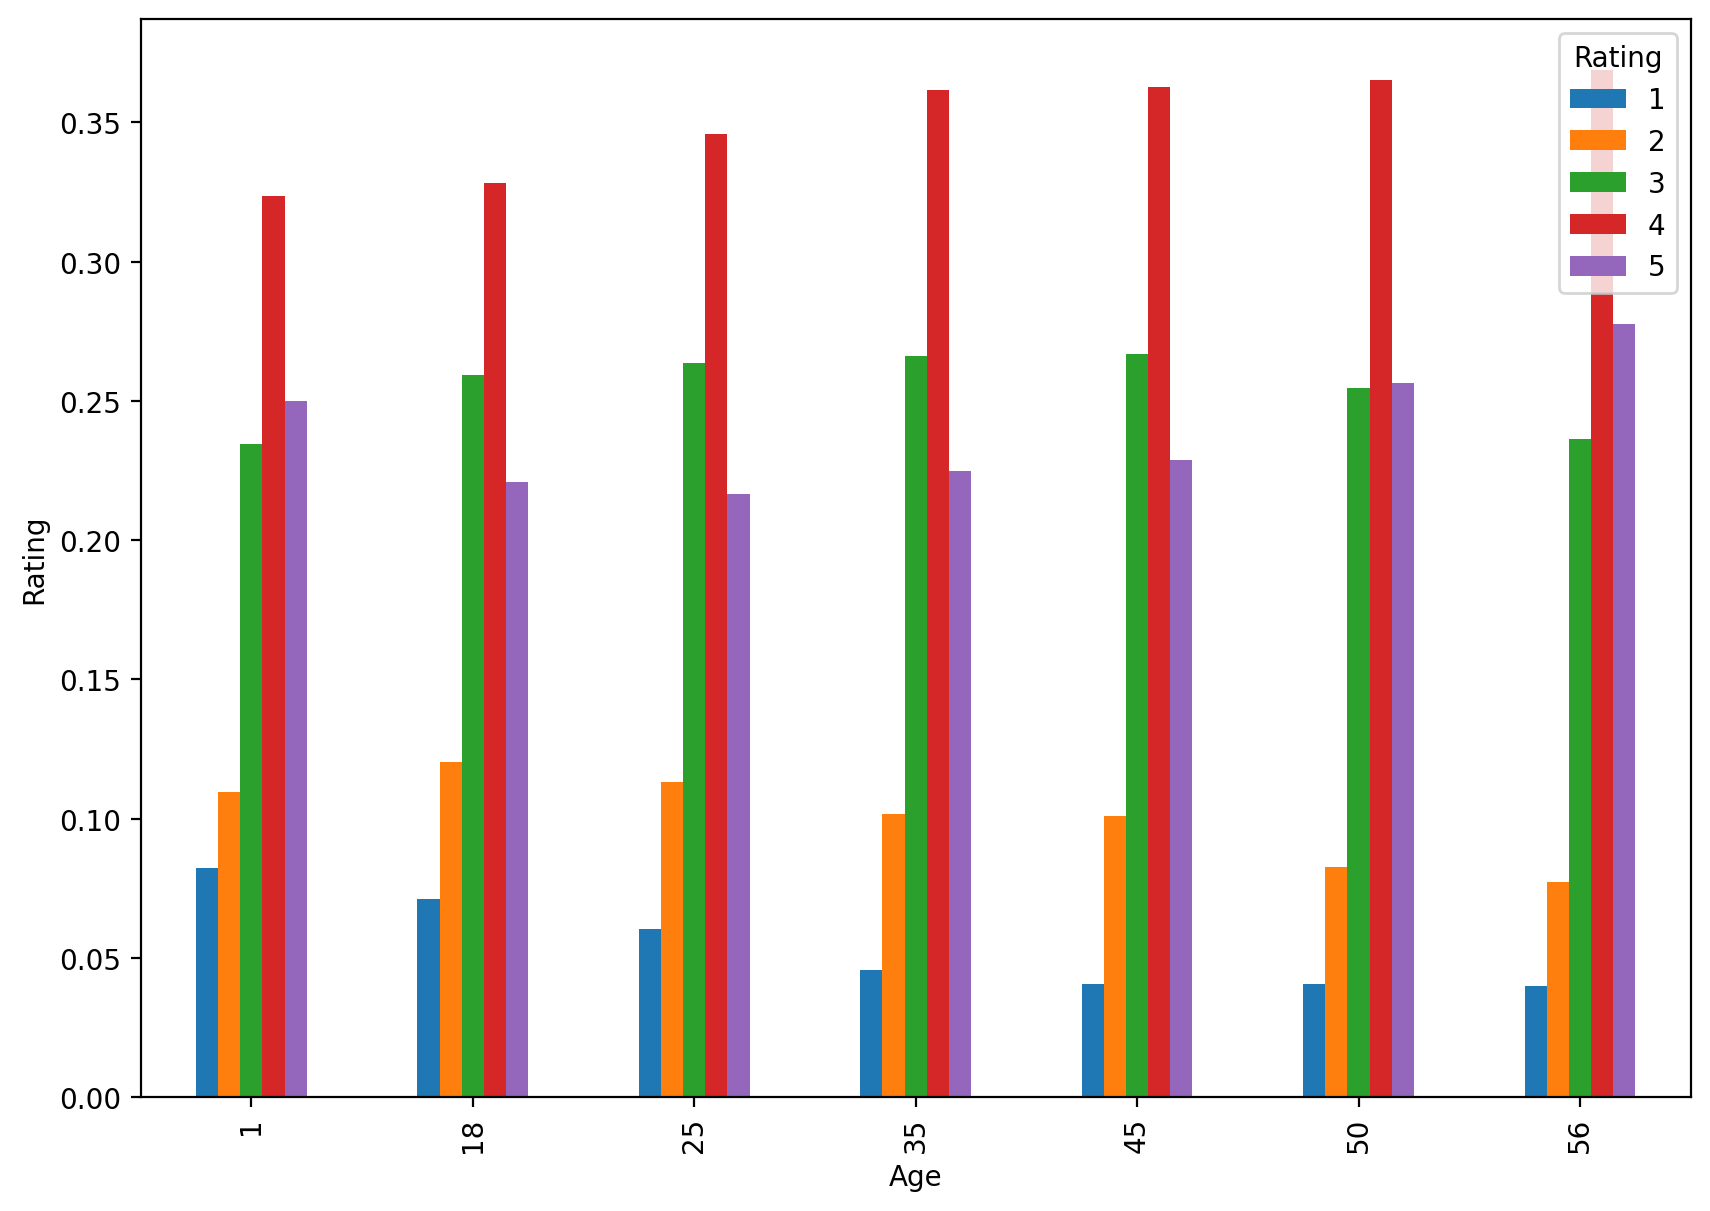

In [ ]:
## Ratingwise given by agewise

#Cross tab - Hospitalization charges vs Severity_level
pd.crosstab(df['Age'],columns=df['Rating'], margins=True)
print()
print()
totalcount=pd.crosstab(df['Age'],columns=df['Rating'], normalize='index')
totalcount.plot(kind='bar',figsize=(10,7))
plt.xlabel("Age")
plt.ylabel("Rating")
plt.show()

WE can see , that the age 25 has hights ratings given and lowest is Age category 1

Rating,1,2,3,4,5,All
Occupation,,,,,,
0,7892,14679,35494,44256,28178,130499
1,4756,9054,22361,30577,18603,85351
2,3062,5486,12919,16899,11702,50068
3,1521,3083,7958,11236,7825,31623
4,9004,15418,33119,43219,30272,131032
5,1070,2552,6446,7127,4655,21850
6,2046,3332,9058,13500,9269,37205
7,5076,10978,28054,38273,23044,105425
8,176,292,820,929,489,2706


<Axes: xlabel='Occupation'>

Text(0.5, 0, 'Occupation')

Text(0, 0.5, 'Rating')

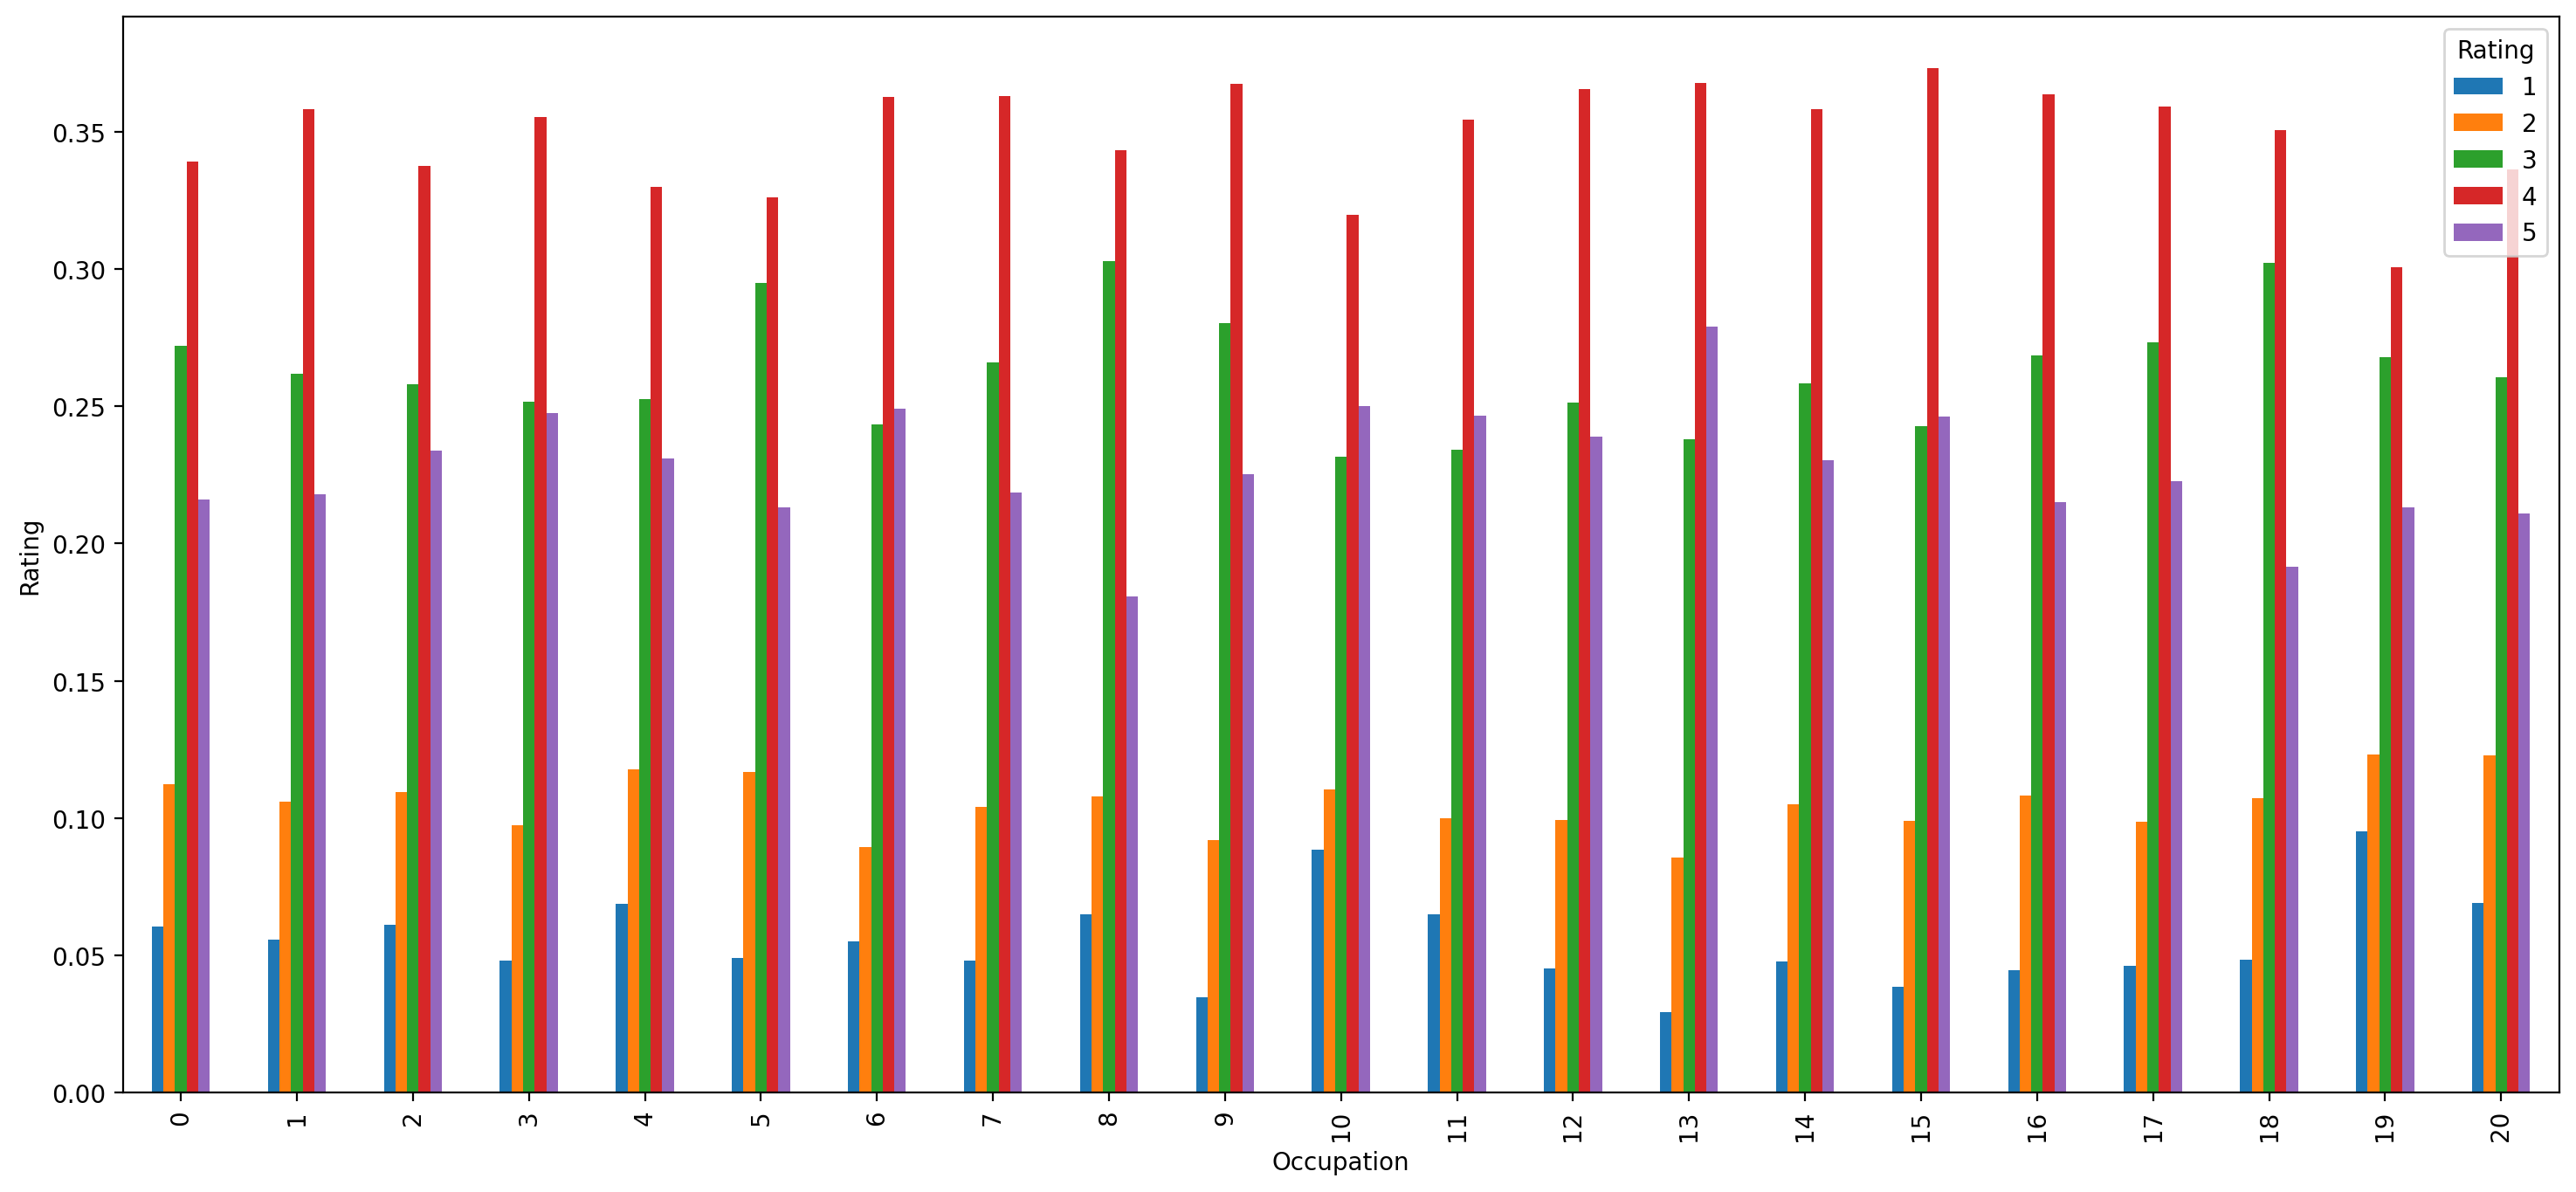

In [ ]:
## Ratings given by Occupationwise 

#Cross tab - Hospitalization charges vs Severity_level
pd.crosstab(df['Occupation'],columns=df['Rating'], margins=True)
print()
print()
totalcount=pd.crosstab(df['Occupation'],columns=df['Rating'], normalize='index')
totalcount.plot(kind='bar',figsize=(18,8))
plt.xlabel("Occupation")
plt.ylabel("Rating")
plt.show()

Which ocupation users haswatched and rated most?

Occupation 4 - has rates the the most , count : 131032

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   User_ID        1000209 non-null  object
 1   Movie_ID       1000209 non-null  int64 
 2   Rating         1000209 non-null  int64 
 3   Gender         1000209 non-null  object
 4   Age            1000209 non-null  int64 
 5   Occupation     1000209 non-null  int64 
 6   Zip_Code       1000209 non-null  int64 
 7   Title          1000209 non-null  object
 8   Genres         1000209 non-null  object
 9   Year_Released  1000209 non-null  int64 
 10  hour           1000209 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 91.6+ MB


Rating,1,2,3,4,5,All
Gender,,,,,,
F,13347,24548,62966,87033,58546,246440
M,42827,83009,198231,261938,167764,753769
All,56174,107557,261197,348971,226310,1000209


<Axes: xlabel='Gender'>

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Rating')

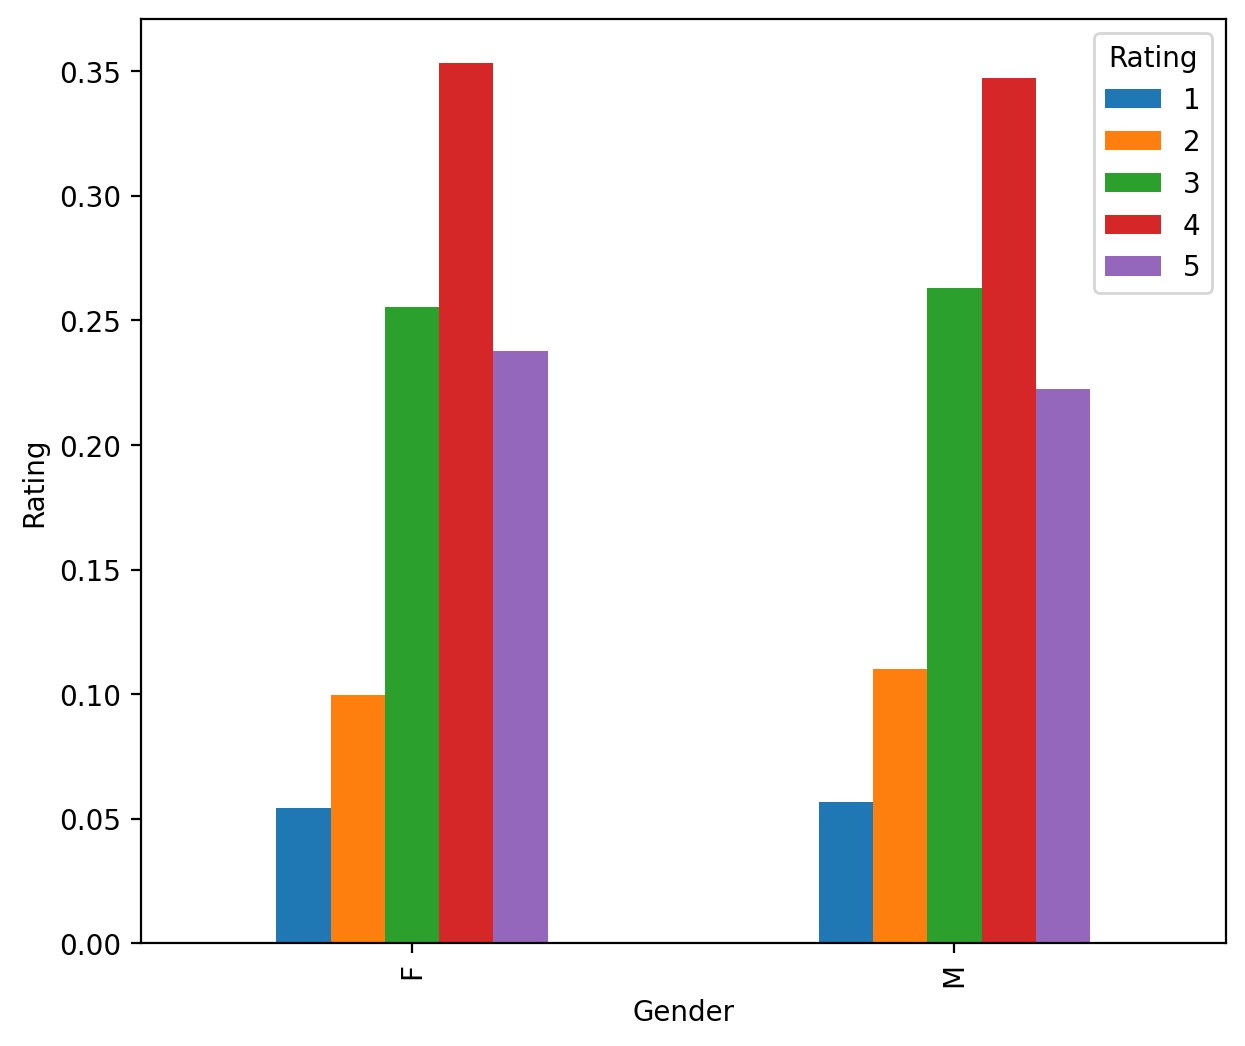

In [ ]:
## Ratings given by Occupationwise 

#Cross tab - Hospitalization charges vs Severity_level
pd.crosstab(df['Gender'],columns=df['Rating'], margins=True)
print()
print()
totalcount=pd.crosstab(df['Gender'],columns=df['Rating'], normalize='index')
totalcount.plot(kind='bar',figsize=(7,6))
plt.xlabel("Gender")
plt.ylabel("Rating")
plt.show()


Most of the users in our dataset who’ve rated the movies are Male. (T/F)?

We can see that most ratings were given by Male with count of 753769


In [ ]:
df['Year_Released']

0          1975
1          1996
2          1964
3          2000
4          1998
           ... 
1000204    1989
1000205    1992
1000206    1995
1000207    1982
1000208    1982
Name: Year_Released, Length: 1000209, dtype: int64

In [ ]:
#Most of the movies present in our dataset were released in which decade?  70s b. 90s c. 50s d.80s
bins=[1923,1940,1950,1960,1970,1980,1990,2000,2010]
group=["20s","40s","50s","60s","70s","80s","90s","2ks"]
df['Year_Released_bin']=pd.cut(df['Year_Released'],bins=bins,labels=group)

In [ ]:
'''## Age wise hospitalization charges

md=df[df['Year_Released_bin']=='20s'].sum()
td=df[df['Year_Released_bin']=='40s'].sum()
sd=df[df['Year_Released_bin']=='50s'].sum()
fd=df[df['Year_Released_bin']=='60s'].sum()
kd=df[df['Year_Released_bin']=='70s'].sum()
cd=df[df['Year_Released_bin']=='80s'].sum()
dd=df[df['Year_Released_bin']=='90s'].sum()
ed=df[df['Year_Released_bin']=='2ks'].sum()

data_dict1 = {'Count':[md,td,sd,fd,kd,cd,dd,ed], 'agegrp': ["Kids","Teens","Adults","old adults","Senior citizen"]}
df_b = pd.DataFrame(data=data_dict1, columns=['Count','agegrp'])
px.bar(data_frame=df_b, x="agegrp", y="Count", color="agegrp", barmode="group",title="Total hospitalization charges for Agewise")'''

'## Age wise hospitalization charges\n\nmd=df[df[\'Year_Released_bin\']==\'20s\'].sum()\ntd=df[df[\'Year_Released_bin\']==\'40s\'].sum()\nsd=df[df[\'Year_Released_bin\']==\'50s\'].sum()\nfd=df[df[\'Year_Released_bin\']==\'60s\'].sum()\nkd=df[df[\'Year_Released_bin\']==\'70s\'].sum()\ncd=df[df[\'Year_Released_bin\']==\'80s\'].sum()\ndd=df[df[\'Year_Released_bin\']==\'90s\'].sum()\ned=df[df[\'Year_Released_bin\']==\'2ks\'].sum()\n\ndata_dict1 = {\'Count\':[md,td,sd,fd,kd,cd,dd,ed], \'agegrp\': ["Kids","Teens","Adults","old adults","Senior citizen"]}\ndf_b = pd.DataFrame(data=data_dict1, columns=[\'Count\',\'agegrp\'])\npx.bar(data_frame=df_b, x="agegrp", y="Count", color="agegrp", barmode="group",title="Total hospitalization charges for Agewise")'

In [ ]:
#Average number of ratings per user
np.mean(df.groupby(['User_ID']).count()['Movie_ID'])

## Building Recommendation system

In [ ]:
df_new=df.copy()

In [ ]:
df_new.head()

,User_ID,Movie_ID,Rating,Gender,Age,Occupation,Zip_Code,Title,Genres,Year_Released,hour,Year_Released_bin
0,1,1193,5,F,1,10,48067,One Flew Over the Cuckoo's Nest,[Drama],1975,22,70s
1,1,661,3,F,1,10,48067,James and the Giant Peach,"[Animation, Children's, Musical]",1996,22,90s
2,1,914,3,F,1,10,48067,My Fair Lady,"[Musical, Romance]",1964,22,60s
3,1,3408,4,F,1,10,48067,Erin Brockovich,[Drama],2000,22,90s
4,1,2355,5,F,1,10,48067,"Bug's Life, A","[Animation, Children's, Comedy]",1998,23,90s


In [ ]:
df.head(1)

,User_ID,Movie_ID,Rating,Gender,Age,Occupation,Zip_Code,Title,Genres,Year_Released,hour,Year_Released_bin
0,1,1193,5,F,1,10,48067,One Flew Over the Cuckoo's Nest,[Drama],1975,22,70s


In [ ]:
u = df.copy()
u = u.set_index('User_ID')
u=u.drop(['Zip_Code','Movie_ID','Title','Genres','Year_Released','Year_Released_bin','Gender'], axis=1)

In [ ]:
f = { 'Rating': 'mean', 'Age': 'first','Occupation': 'first','hour': 'mean'}
z=u.groupby(['User_ID'], as_index=True).agg(f)

z.rename(columns = {'Rating':'u_avg_rating'}, inplace = True)

In [ ]:
col_names =  ['u_avg_rating','Age', 'Occupation', 'hour']
features = z[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

z[col_names] = features

In [ ]:
s=df[['User_ID','Movie_ID']].merge(z,on="User_ID",how="right")

In [ ]:
g=df[['Movie_ID','User_ID','Rating']]

In [ ]:
g.head(1000)

,Movie_ID,User_ID,Rating
0,1193,1,5
1,661,1,3
2,914,1,3
3,3408,1,4
4,2355,1,5
...,...,...,...
995,3704,10,2
996,1020,10,3
997,784,10,3
998,858,10,3


In [ ]:
m.head()

Genres,,A,Acti,Action,Adv,Advent,Adventu,Adventur,Adventure,Animati,...,Sci-Fi,Th,Thri,Thrille,Thriller,Wa,War,We,Wester,Western
Movie_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,User_ID,Movie_ID,Rating,Gender,Age,Occupation,Zip_Code,Title,Genres,Year_Released,hour,Year_Released_bin
0,1,1193,5,F,1,10,48067,One Flew Over the Cuckoo's Nest,[Drama],1975,22,70s
1,1,661,3,F,1,10,48067,James and the Giant Peach,"[Animation, Children's, Musical]",1996,22,90s
2,1,914,3,F,1,10,48067,My Fair Lady,"[Musical, Romance]",1964,22,60s
3,1,3408,4,F,1,10,48067,Erin Brockovich,[Drama],2000,22,90s
4,1,2355,5,F,1,10,48067,"Bug's Life, A","[Animation, Children's, Comedy]",1998,23,90s


## Pearson Correletion


WE first find the movieID which has less rating ,and remove those movies

In [ ]:
# Average mean rating of movies

c=pd.DataFrame(df.groupby('Movie_ID')['Rating'].mean())
c


,Rating
Movie_ID,
1,4.146846
2,3.201141
3,3.016736
4,2.729412
5,3.006757
...,...
3948,3.635731
3949,4.115132
3950,3.666667


### Average count

In [ ]:
average_rating = pd.DataFrame(df.groupby('Movie_ID')['Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(df.groupby('Movie_ID')['Rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,Rating,ratingCount
Movie_ID,,
2858,4.317386,3428
260,4.453694,2991
1196,4.292977,2990
1210,4.022893,2883
480,3.763847,2672


In [ ]:
# Item_based
df_movie_rating_pivot = df.pivot(index='User_ID', columns='Movie_ID',values='Rating')
print(df_movie_rating_pivot.shape)
df_movie_rating_pivot.head()

(6040, 3706)


Movie_ID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,5.0,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
1000,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,5.0,4.0,5.0,4.0


In [ ]:
movie_to_show= pd.DataFrame(df.groupby('Movie_ID')['Title','Year_Released','Genres'].first())

def call_me_pearson(id):

  print("Movie_ID::",id)
  movies_ratings = df_movie_rating_pivot[id]
  similar_movies = df_movie_rating_pivot.corrwith(movies_ratings)
  corr_movies = pd.DataFrame(similar_movies, columns=['pearsonR'])
  corr_movies.dropna(inplace=True)
  corr_summary = corr_movies.join(average_rating['ratingCount'])
  # We exclude movies of rating count than 300 and recommend
  pearson_recommended= corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR', ascending=False).head(10)
  print(pearson_recommended)
  movies_recommended = pd.DataFrame(pearson_recommended.reset_index()['Movie_ID'], 
                                  index=np.arange(9), columns=['Movie_ID'])
  corr_books = pd.merge(movies_recommended, movie_to_show, on='Movie_ID')
  
  return corr_books

In [ ]:
def Recommend_me_Movies(movie_id,type):
  print(movie_id)
  if(type=='pearson'):
    corr_books=call_me_pearson(movie_id)
  return corr_books

In [ ]:
Recommend_me_Movies(2643,'pearson')

2643
Movie_ID:: 2643
          pearsonR  ratingCount
Movie_ID                       
2643      1.000000          332
2642      0.709290          511
1373      0.584758          613
2340      0.573391          344
420       0.557598          352
2404      0.554216          301
3452      0.530862          331
1562      0.529140          606
1438      0.516390          321
2431      0.513992          474


,Movie_ID,Title,Year_Released,Genres
0,2643,Superman IV: The Quest for Peace,1987,"[Action, Adventure, Sci-Fi]"
1,2642,Superman III,1983,"[Action, Adventure, Sci-Fi]"
2,1373,Star Trek V: The Final Frontier,1989,"[Action, Adventure, Sci-Fi]"
3,2340,Meet Joe Black,1998,[Romance]
4,420,Beverly Hills Cop III,1994,"[Action, Comedy]"
5,2404,Rambo III,1988,"[Action, War]"
6,3452,Romeo Must Die,2000,"[Action, Romance]"
7,1562,Batman & Robin,1997,"[Action, Adventure, Crime]"
8,1438,Dante's Peak,1997,"[Action, Thriller]"


## Cosine Similarity - USER BASED APPROACH

In [ ]:
# User_based
df_rating = df.drop_duplicates(['User_ID', 'Movie_ID'])
df_user_rating_pivot = df_rating.pivot(index = 'Movie_ID', columns = 'User_ID', values = 'Rating').fillna(0)
df_user_rating_pivot


User_ID,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
Movie_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,5.0,0.0,5.0,4.0,0.0,0.0,5.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
2,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.0,4.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,4.0,0.0
3949,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0
3950,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Csr_matrix 
from scipy.sparse import csr_matrix
df_user_rating_matrix = csr_matrix(df_user_rating_pivot.values)
df_user_rating_matrix


from sklearn.neighbors import NearestNeighbors


<6040x3706 sparse matrix of type '<class 'numpy.float64'>'
	with 1000209 stored elements in Compressed Sparse Row format>

In [ ]:
# Sparse matrix
df_user_rating_matrix.todense()

matrix([[5., 0., 0., ..., 0., 0., 0.],
        [5., 5., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [4., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(df_user_rating_matrix)
query_index = np.random.choice(df_user_rating_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(df_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 5)
df_user_rating_pivot.index[query_index]
df_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1)
items=[]
for i in range(0, len(distances.flatten())):
  if i == 0:
      print('Recommendations for User_ID {0}:\n'.format(query_index))
  else:
      items.append(df_user_rating_pivot.index[indices.flatten()[i]])
      print('{0}: {1}, with distance of {2}:'.format(i, df_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

NearestNeighbors(algorithm='brute', metric='cosine')

2498


'3247'

array([[0., 0., 0., ..., 0., 0., 0.]])

Recommendations for User_ID 2498:

1: 5732, with distance of 0.5156237098540728:
2: 3867, with distance of 0.5449006068163351:
3: 2927, with distance of 0.5721388376937042:
4: 3730, with distance of 0.5760314286197952:


Since we know , Movie id 2643 is superman and it is related to comics genre- [Action, Adventure, Sci-Fi] . We can expect similar movies in our recommendation system

In [ ]:
Recommend_me_Movies(2643,'pearson')

2643
Movie_ID:: 2643
Empty DataFrame
Columns: [pearsonR, ratingCount]
Index: []


,Movie_ID,Title,Year_Released,Genres


In [ ]:
items=[]
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(df_user_rating_pivot.index[query_index]))
    else:
        items.append(df_user_rating_pivot.index[indices.flatten()[i]])
        print('{0}: {1}, with distance of {2}:'.format(i, df_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))


Recommendations for 863:

1: 2591, with distance of 0.6658923721661774:
2: 821, with distance of 0.6658923721661774:
3: 878, with distance of 0.7358647281023128:
4: 1002, with distance of 0.7412013443117478:
5: 3228, with distance of 0.7509708774541239:


In [ ]:
movie_to_show.loc[items]

,Title,Year_Released,Genres
Movie_ID,,,
1982,Halloween,1978,[Horror]
1345,Carrie,1976,[Horror]
1997,"Exorcist, The",1973,[Horror]
2789,Damien: Omen II,1978,[Horror]


## Matrix Factorization

In [ ]:
# Innstalling cmfrec
!pip install cmfrec

# We need only User_id , movie_id , rating to pass into cmfrec model
rm_raw = df[['User_ID', 'Movie_ID', 'Rating']].copy()
rm_raw.columns = ['UserId', 'ItemId', 'Rating'] # Lib requires specific column
rm_raw.head(2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,UserId,ItemId,Rating
0,1,1193,5
1,1,661,3


In [ ]:
from cmfrec import CMF
model = CMF(k=2, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model.fit(rm_raw)

Collective matrix factorization model
(explicit-feedback variant)


In [ ]:
model.A_.shape

(6040, 2)

In [ ]:
model.B_.shape

(3706, 2)

In [ ]:
model.glob_mean_

3.581564426422119

In [ ]:
#Matrix

np.dot(model.A_, model.B_.T) + model.glob_mean_

array([[4.098743 , 4.045168 , 4.295278 , ..., 2.8181195, 4.10149  ,
        3.63368  ],
       [4.330055 , 3.5862978, 4.131784 , ..., 3.2766948, 3.827661 ,
        3.6999714],
       [4.178837 , 3.807326 , 4.181461 , ..., 3.0717173, 3.9466643,
        3.661728 ],
       ...,
       [4.10368  , 3.4726033, 3.8840344, ..., 3.5037112, 3.6679041,
        3.671403 ],
       [4.2600183, 3.5220835, 4.034094 , ..., 3.3818016, 3.7561634,
        3.6930063],
       [4.6092353, 2.880293 , 3.824197 , ..., 4.012908 , 3.3815026,
        3.7897987]], dtype=float32)

In [ ]:
# Top items to recomment for user 16 and N=5 
top_items = model.topN(user=16, n=5)

In [ ]:
top_items

array([3905, 3245,   53, 2839,  670])

In [ ]:
movie_to_show.loc[top_items]

,Title,Year_Released,Genres
Movie_ID,,,
3905,"Specials, The",2000,[Comedy]
3245,I Am Cuba,1999,[Drama]
53,Lamerica,1994,[Drama]
2839,West Beirut,1999,[Drama]
670,"World of Apu, The",1999,[Drama]


## USER-BASED Collaborative filtering

In [ ]:
from cmfrec import CMF
model = CMF(k=50, lambda_=0.1, user_bias=True, item_bias=False, verbose=False)
model.fit(rm_raw)

In [ ]:
model.A_.shape

(6040, 50)

In [ ]:
model.B_.shape

(3706, 50)

In [ ]:
model.glob_mean_

3.581564426422119

In [ ]:
#Matrix

np.dot(model.A_, model.B_.T) + model.glob_mean_

array([[4.9648023 , 2.8575053 , 3.081914  , ..., 3.7082021 , 3.7501268 ,
        3.5543048 ],
       [5.449146  , 2.59841   , 4.0762005 , ..., 2.4498453 , 3.5421574 ,
        3.5549338 ],
       [4.9874406 , 2.2858243 , 3.6160545 , ..., 0.81975937, 3.3218412 ,
        3.9003735 ],
       ...,
       [4.243141  , 1.6960422 , 4.9584484 , ..., 4.1237698 , 3.507668  ,
        3.664708  ],
       [3.337154  , 2.8306227 , 4.2128654 , ..., 4.0498414 , 3.4804187 ,
        3.667985  ],
       [4.8226633 , 4.4276705 , 3.786277  , ..., 3.6590767 , 3.6374903 ,
        3.6049082 ]], dtype=float32)

In [ ]:
# Top items to recomment for user 16 and N=5 
top_items = model.topN(user=16, n=5)

In [ ]:
movie_to_show.loc[top_items]

,Title,Year_Released,Genres
Movie_ID,,,
3075,Repulsion,1965,[Thriller]
2970,Fitzcarraldo,1982,"[Adventure, Drama]"
2165,Your Friends and Neighbors,1998,[Drama]
3200,"Last Detail, The",1973,"[Comedy, Drama]"
262,"Little Princess, A",1995,"[Children's, Drama]"


## ITEM-BASED Collaborative Filtering

In [ ]:
!pip install scikit-surprise
from surprise import SVD
from surprise.model_selection import cross_validate

from surprise import KNNWithMeans 
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# The Reader class is used to parse a file containing ratings.It orders the data in format of (userid,title,rating) and even by considering the rating scale
reader = Reader(rating_scale=(0.5 , 5))
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['User_ID','Movie_ID','Rating']], reader) # loading the data as per the format

In [ ]:
svd = SVD() #Suprise library uses the SVD algorithm to perform the matrix factorisation where as other libraries uses ALS
cross_validate(svd, data, measures=['rmse','mae'], cv = 5 , return_train_measures=True,verbose=True)
##The dataset is divided into train and test and with 5 folds the rmse has been calculated'''

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8744  0.8731  0.8752  0.8730  0.8738  0.8739  0.0008  
MAE (testset)     0.6868  0.6854  0.6871  0.6855  0.6864  0.6862  0.0007  
RMSE (trainset)   0.6694  0.6690  0.6702  0.6709  0.6713  0.6702  0.0009  
MAE (trainset)    0.5298  0.5295  0.5302  0.5308  0.5312  0.5303  0.0006  
Fit time          16.70   16.71   17.52   17.49   17.24   17.13   0.36    
Test time         1.75    2.64    2.60    1.74    1.53    2.05    0.47    


{'test_rmse': array([0.87437756, 0.87310067, 0.87516446, 0.87298391, 0.87375024]),
 'train_rmse': array([0.66942728, 0.66899672, 0.67023368, 0.67089425, 0.6713209 ]),
 'test_mae': array([0.6867599 , 0.68540118, 0.68705921, 0.68545874, 0.68642771]),
 'train_mae': array([0.5298325 , 0.52946503, 0.53023373, 0.53080495, 0.5312451 ]),
 'fit_time': (16.69705057144165,
  16.70866084098816,
  17.524279832839966,
  17.493041276931763,
  17.240981340408325),
 'test_time': (1.7540340423583984,
  2.643594741821289,
  2.5968234539031982,
  1.735997200012207,
  1.5295557975769043)}

In [ ]:
#An antiset is a set of those user and item pairs for which a rating doesn't exist in original dataset. This is the set for which we are trying to predict ratings.
anti_set = data.build_full_trainset().build_anti_testset()

#Test-Train dataset
trainset, testset = train_test_split(data, test_size=.15) # Splitting the data

In [ ]:
# K value represents the (max) number of neighbors to take into account for aggregation. Example for every item it gives 50 nearest ones.
# There are many similarity options to calculate the similarity between the neighbors . Here, we have used the cosine similarity.
# when user_based = False then it performs item based collaborative filtering

algo_i = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})
algo_i.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
# run the trained model against the testset
test_pred = algo_i.test(testset)
test_pred[0]

Prediction(uid='5353', iid=1952, r_ui=3.0, est=4.012520431660094, details={'actual_k': 50, 'was_impossible': False})

In [ ]:
# get RMSE on test set
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 0.8925


0.8925051530036632

In [ ]:
accuracy.mse(test_pred,verbose=True)

MSE: 0.7966


0.7965654481380923

In [ ]:
accuracy.mae(test_pred,verbose=True)

MAE:  0.7022


0.7022236236570895

In [ ]:
# we can query for specific predicions
uid = str(196)  # raw user id
iid = str(303)  # raw item id

In [ ]:
# Predicting for unknown user or item
pred = algo_i.predict(uid, iid, verbose=True)

user: 196        item: 303        r_ui = None   est = 3.58   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


### Predicting for Movie ID = 10 and getting 5 nearest neighbour

In [ ]:
tsr_inner_id = algo_i.trainset.to_inner_iid(10) #Considering the movieId 10

tsr_neighbors = algo_i.get_neighbors(tsr_inner_id, k=5) #Getting the 5 nearest neighbors for movieId 10

top_items=[algo_i.trainset.to_raw_iid(inner_id) for inner_id in tsr_neighbors]
movie_to_show.loc[top_items]

,Title,Year_Released,Genres
Movie_ID,,,
3880,"Ballad of Ramblin' Jack, The",2000,[Documentary]
1874,Still Breathing,1997,"[Comedy, Romance]"
3025,Rough Night in Jericho,1967,[Western]
1893,Beyond Silence,1996,[Drama]
1444,Guantanamera,1994,[Comedy]


'movies[movie_to_show.movieId.isin([algo.trainset.to_raw_iid(inner_id)\n                       for inner_id in tsr_neighbors])] #Displaying the 5 nearest neighbors to the Toy Story.'

#OBSERVATIONS

- We can see that the shape of datatset is 1000209 ,12
- The Value count of movies are highest for American Beauty
- There are more movies of comedy genre present in the dataset
- Film-Noir Genre is less in the dataset
- Age has high correlation and also occupation has high correlation
- The Age category of 1 has more value counts in dataset
- The White boys film has most least rating  and American beauty has highest rating in the dataset
- The Age group 25 has given highest rating 
- The age of 25 has given more rating than all
- Male has less 4 star and 5 star ratings then females
- As we see , the movie_id 2958 has more average rating with 4.31 and rating count of 3428

#RECOMMENDATIONS

- We can see from the ease score , that the surprise library has predicted and recommended good correlated movies 
- Also we need to try other functions in cmfrec library to see , how they perform
- Surprise SVD library takes more time to predict the the test data , than cmfrec
- And also , the item based approach is giving more correlated recommendatons , as we used Pearson correlation metrics
- The metrics we have used  RMSE , MSE and MAE metrics , and have received less metrics score , so we can use hyperparameter tuning to find the best recommendations 
- We can also use other powerful metrics to find the best model
- We need to give time to train models with different hyper parameters , different functions in different libraries to achieve the best recommendation
- We can also use functions like TopN_warm , TopN_Cold etc in cmfrec library  to identify the best model